In [3]:
pip install category_encoders

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('car.csv') # data frame 
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.head() 

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class'] # replace the column name
df.columns = col_names
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.info() # to check the null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.isnull().sum() # to check the null value and count the null value

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class'] # frequency distribution of valuse in variable
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
# class is consider as a target variable

In [13]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
X = df.drop(['class'],axis=1) #declare feature vector and target variable
y = df['class']

In [15]:
import category_encoders as ce

In [16]:
encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(X)
X

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1722,4,4,4,3,2,1
1723,4,4,4,3,2,2
1724,4,4,4,3,3,3
1725,4,4,4,3,3,1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [18]:
X_train.shape, X_test.shape # Shape of X_train,X_test

((1208, 6), (519, 6))

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,3,3,4,2,3,2
585,2,2,2,3,1,1
1551,4,3,2,2,2,1
727,2,3,3,3,3,2
707,2,3,3,1,3,3


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,3
932,3,1,3,2,3,3
628,2,2,4,1,3,2
1497,4,2,4,2,2,1
1262,3,4,3,3,2,3


In [21]:
X_train.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred = gini.predict(X_test)
y_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'a

In [25]:
y_test

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
        ...  
490     unacc
1276    unacc
287     unacc
701     unacc
1713     good
Name: class, Length: 519, dtype: object

In [26]:
from sklearn.metrics import accuracy_score
print('model accuracy score with gini index:{0:0.4f}'.format(accuracy_score(y_test, y_pred)))

model accuracy score with gini index:0.8015


[Text(0.6, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.6, 0.375, 'x[0] <= 2.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.4, 0.125, 'gini = 0.496\nsamples = 280\nvalue = [128, 0, 152, 0]'),
 Text(0.8, 0.125, 'gini = 0.653\nsamples = 267\nvalue = [138, 52, 35, 42]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

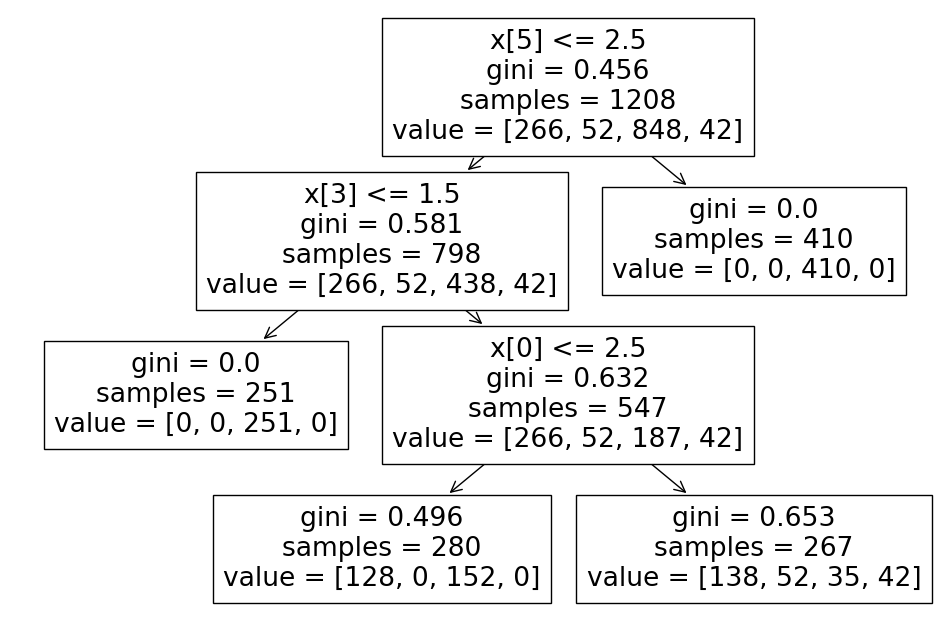

In [27]:
plt.figure(figsize =(12,8))
from sklearn import tree
tree.plot_tree(gini.fit(X_train,y_train))

In [28]:
entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred = entropy.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print('model accuracy with entropy:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

model accuracy with entropy:0.8015


In [31]:
y_pred_train = entropy.predict(X_train)
print('model accuracy with entropy:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

model accuracy with entropy:0.7873


In [32]:
y_pred_train

array(['acc', 'unacc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [33]:
print('Training set score: {:.4f}'.format(entropy.score(X_train,y_train)))
print('testing set score: {:.4f}'.format(entropy.score(X_train,y_train)))    

Training set score: 0.7873
testing set score: 0.7873


[Text(0.6, 0.875, 'x[5] <= 2.5\nentropy = 1.203\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.6, 0.375, 'x[0] <= 2.5\nentropy = 1.642\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.4, 0.125, 'entropy = 0.995\nsamples = 280\nvalue = [128, 0, 152, 0]'),
 Text(0.8, 0.125, 'entropy = 1.756\nsamples = 267\nvalue = [138, 52, 35, 42]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

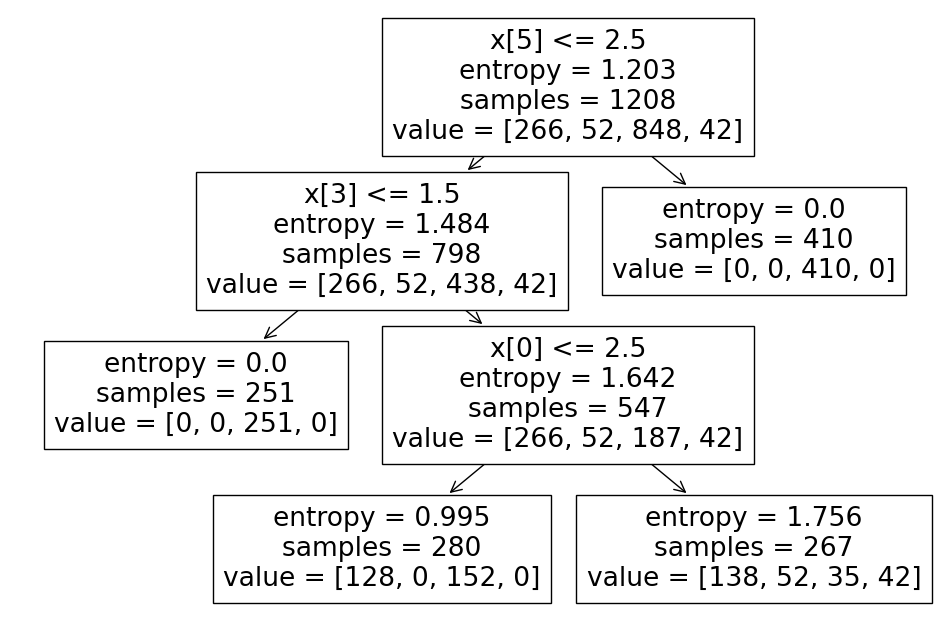

In [34]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(entropy.fit(X_train,y_train))

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('confusion matix:', cm)

confusion matix: [[ 66   0  52   0]
 [ 17   0   0   0]
 [ 11   0 350   0]
 [ 23   0   0   0]]


In [36]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       118
        good       0.00      0.00      0.00        17
       unacc       0.87      0.97      0.92       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.80       519
   macro avg       0.36      0.38      0.37       519
weighted avg       0.73      0.80      0.77       519



C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [37]:
print(accuracy_score(y_test,y_pred))

0.8015414258188824


In [38]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()

In [42]:
rm.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = rm.predict(X_test)
y_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'unacc',
       'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
     

In [44]:
y_test

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
        ...  
490     unacc
1276    unacc
287     unacc
701     unacc
1713     good
Name: class, Length: 519, dtype: object

In [45]:
print(accuracy_score(y_test,y_pred))

0.9653179190751445


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       118
        good       0.85      0.65      0.73        17
       unacc       0.99      1.00      0.99       361
       vgood       0.79      0.83      0.81        23

    accuracy                           0.97       519
   macro avg       0.89      0.85      0.87       519
weighted avg       0.96      0.97      0.96       519

